# Assignment 3 (Forest Cover)

- Name: **Arnab Sen**
- Roll: **510519006**
- Date: **Sept 5, 2022**

## Task 5

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
drive.mount('/content/drive')
BASE_PATH = '/content/drive/MyDrive/Colab_Notebooks/ML_DRIVE/Assign_3/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv(f"{BASE_PATH}/covtype.csv")
print("Dataset shape:", dataset.shape)
print("Dataset columns:", dataset.columns)

Dataset shape: (581012, 55)
Dataset columns: Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soi

In [ ]:
# Let's check for missing values once
dataset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
scaled_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
'Horizontal_Distance_To_Fire_Points']
for col in scaled_cols:
  scaler = StandardScaler()
  dataset[[col]] = pd.DataFrame(
    data=scaler.fit_transform(dataset[[col]]),
    index=dataset.index,
    columns=[col]
  )

In [ ]:
def plot_count(y):
  before_dist = Counter(y)
  print("Before undersampling: ", before_dist)
  plt.xlabel("Count")
  plt.ylabel("Cover Type")
  plt.title("Count of each cover type")
  plt.bar(before_dist.keys(), before_dist.values())

Before undersampling:  Counter({2: 283301, 1: 211840, 3: 35754, 7: 20510, 6: 17367, 5: 9493, 4: 2747})


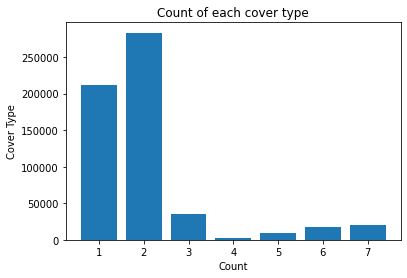

In [ ]:
X = dataset.drop('Cover_Type', axis = 1)
y = dataset['Cover_Type']

plot_count(y)

Before undersampling:  Counter({1: 2747, 2: 2747, 3: 2747, 4: 2747, 5: 2747, 6: 2747, 7: 2747})


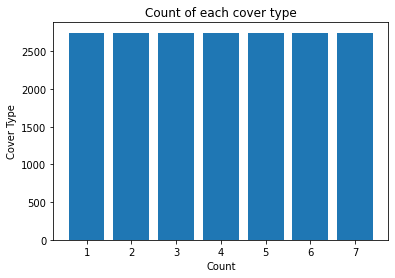

In [ ]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='not minority')
X, y = undersample.fit_resample(X, y)
plot_count(y)

In [ ]:
X_train, _X, y_train, _y = train_test_split(X, y, train_size=0.8)

X_test, X_val, y_test, y_val = train_test_split(_X, _y, train_size = 0.5)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(15383, 54)
(1923, 54)
(1923, 54)


In [ ]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
cm = confusion_matrix(y_test, pred)
f1 = f1_score(y_test, pred, average='macro')
accuracy = clf.score(X_test, y_test)
print(f"Accuracy = {accuracy}\n")
print(f"F1 Score = {f1}\n")

Accuracy = 0.7384295371814873

F1 Score = 0.7370705253598765



## Task 6

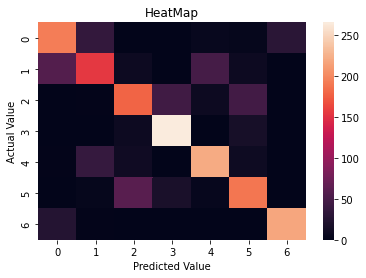

In [ ]:
sns.heatmap(cm)
plt.title('HeatMap')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [ ]:
sub_X_train = X.iloc[:, 0:2]
sub_y_train = y

sub_train = sub_X_train.join(sub_y_train)
sub_train = sub_train[sub_train['Cover_Type'].isin([1,2,3])]

sub_X = sub_train.drop('Cover_Type', axis = 1)
sub_y = sub_train['Cover_Type']


Before undersampling:  Counter({1: 2747, 2: 2747, 3: 2747})


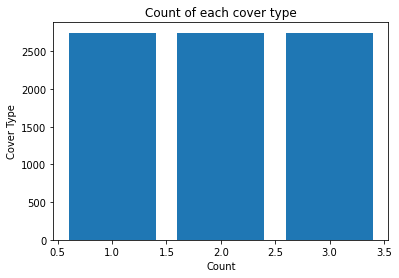

In [ ]:
plot_count(sub_y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sub_X, sub_y, train_size=0.8)

In [ ]:
regr = LogisticRegression(multi_class='multinomial')
model = regr.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f"Accuracy (Test) = {model.score(X_test, y_test)}")
print(f"Accuracy (Train) = {model.score(X_train, y_train)}")
print(f"F1 Score (Test)= {f1_score(y_test, y_pred_test, average='macro')}")
print(f"F1 Score (Train)= {f1_score(y_train, y_pred_train, average='macro')}")

Accuracy (Test) = 0.7762280169799879
Accuracy (Train) = 0.7747269417475728
F1 Score (Test)= 0.7768385474602933
F1 Score (Train)= 0.7728824335147572


In [ ]:
df_train = X_train
df_train['CoverType'] = y_train
df_train

,Elevation,Aspect,CoverType
4190,0.534439,1.325515,2
2377,-0.665627,1.691869,1
7853,-1.872837,-1.104931,3
2254,0.673733,-1.095995,1
3796,0.205850,-0.479448,2
...,...,...,...
6322,-1.276375,-1.194285,3
7471,-1.026361,0.333679,3
5816,-2.912180,0.905548,3
48,0.291569,1.343386,1


In [ ]:
df_test = X_test
df_test['CoverType'] = y_test
df_test

,Elevation,Aspect,CoverType
3215,-0.062022,1.504224,2
7850,-2.104993,1.137870,3
2438,1.195190,-0.792190,1
6795,-1.204943,0.342614,3
1512,0.266567,-0.935157,1
...,...,...,...
4848,1.030895,-0.586674,2
2120,1.113043,1.816965,1
3432,-1.097794,-1.185350,2
4260,-0.644197,0.476646,2


In [ ]:
df_pred_test = X_test
df_pred_test['CoverType'] = y_pred_test
df_pred_test

,Elevation,Aspect,CoverType
3215,-0.062022,1.504224,2
7850,-2.104993,1.137870,3
2438,1.195190,-0.792190,1
6795,-1.204943,0.342614,3
1512,0.266567,-0.935157,1
...,...,...,...
4848,1.030895,-0.586674,1
2120,1.113043,1.816965,1
3432,-1.097794,-1.185350,2
4260,-0.644197,0.476646,2


In [ ]:
df_pred_train = X_train
df_pred_train['CoverType'] = y_pred_train
df_pred_train

,Elevation,Aspect,CoverType
4190,0.534439,1.325515,1
2377,-0.665627,1.691869,2
7853,-1.872837,-1.104931,3
2254,0.673733,-1.095995,1
3796,0.205850,-0.479448,2
...,...,...,...
6322,-1.276375,-1.194285,3
7471,-1.026361,0.333679,2
5816,-2.912180,0.905548,3
48,0.291569,1.343386,2


In [ ]:
df_trains = [df_train[df_train['CoverType'] == i] for i in [1, 2, 3]]
df_tests = [df_test[df_test['CoverType'] == i] for i in [1, 2, 3]]
df_pred_tests = [df_pred_test[df_pred_test['CoverType'] == i] for i in [1, 2, 3]]
df_pred_trains = [df_pred_train[df_pred_train['CoverType'] == i] for i in [1, 2, 3]]

## Task 7

In [ ]:
def plot_scatter(title, dfs):
  plt.xlabel("Aspect")
  plt.ylabel("Elevation")
  plt.title(title)
  for _df in dfs:
    plt.scatter(_df['Aspect'], _df['Elevation'])

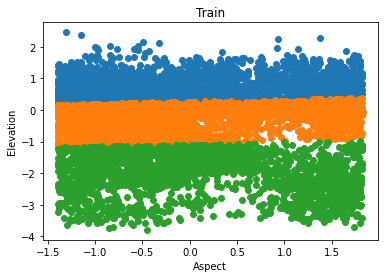

In [ ]:
plot_scatter("Train", df_trains)

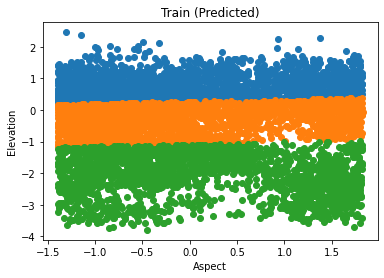

In [ ]:
plot_scatter("Train (Predicted)", df_pred_trains)

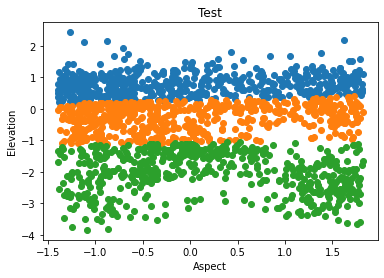

In [ ]:
plot_scatter("Test", df_tests)

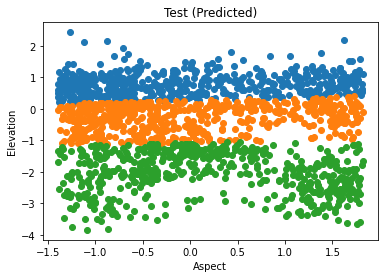

In [ ]:
plot_scatter("Test (Predicted)", df_pred_tests)